In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Importing dataset as dataframe
file_path = r'E:\paython\HousingData.csv'  # Correct file path here
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [4]:
# Replacing '?' with NaN for missing values
df.replace('?', np.nan, inplace=True)

# Checking for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# List of column names to process
columns_to_fill = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

# Replacing NaN values with the mean of each column
for column in columns_to_fill:
    df[column] = df[column].astype(float).fillna(df[column].astype(float).mean())

# Verifying there are no more missing values in the processed columns
print("Missing values after processing:")
print(df[columns_to_fill].isnull().sum())


Missing values in each column:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
Missing values after processing:
CRIM     0
ZN       0
INDUS    0
CHAS     0
AGE      0
LSTAT    0
dtype: int64


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


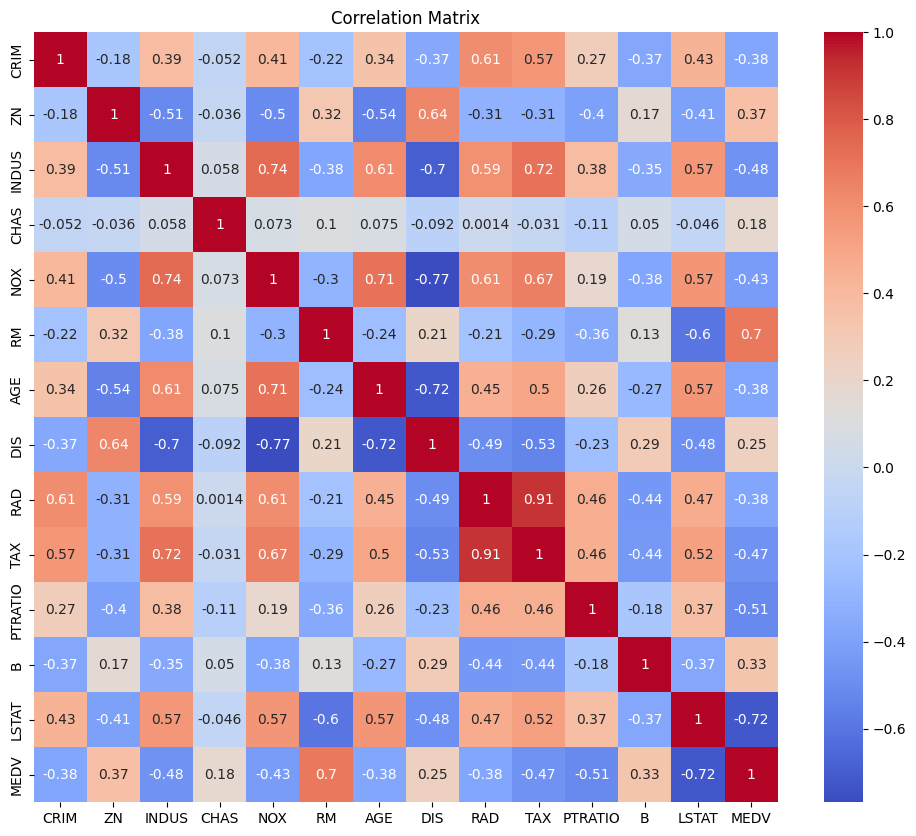

In [6]:
# Displaying data types and information about the dataset
print("Dataset information:")
print(df.info())

# Generating and visualizing the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [8]:
# Defining features (X) and target (y)
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df['MEDV']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Displaying the model's coefficients and intercept
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)


Model coefficients: [-1.14139919e-01  2.90156278e-02 -2.71329054e-02  3.24067342e+00
 -1.60175433e+01  4.75240956e+00 -1.95196142e-02 -1.52159267e+00
  2.22822577e-01 -9.15063665e-03 -8.86045288e-01  1.22626115e-02
 -4.38440425e-01]
Model intercept: 27.912465201030834


In [12]:
# Predicting housing prices on the test set
y_pred = model.predict(X_test)

# Calculating and displaying the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 25.017672023842703


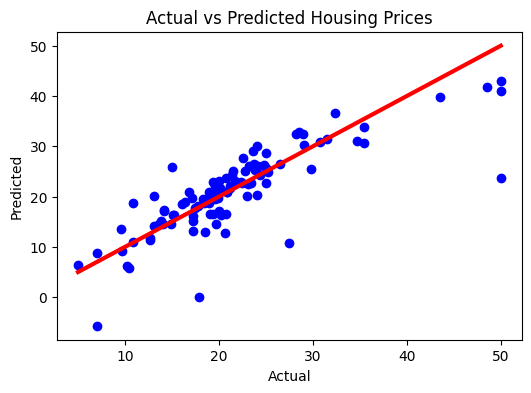

In [13]:
# Visualizing the results: Actual vs Predicted housing prices
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Housing Prices')
plt.show()
